In [2]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

NameError: name 'keras' is not defined

In [24]:
print(len(X_train))
print(len(X_test))
X_train.shape

60000
10000


(60000, 28, 28)

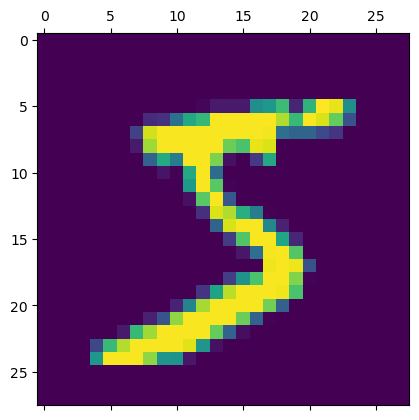

In [5]:
plt.matshow(X_train[0])

In [6]:
y_train[0]

5

In [25]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [61]:
X_train=X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [12]:
#X_train[0]

In [57]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.7691 - accuracy: 0.8398
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.2417 - accuracy: 0.8772
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6694 - accuracy: 0.8840
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6099 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5025 - accuracy: 0.8874


In [62]:
X_test= X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [51]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.0740 - accuracy: 0.9037


[5.07403564453125, 0.9036999940872192]

In [63]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
    ])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2842 - accuracy: 0.9456
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0657 - accuracy: 0.9801
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0493 - accuracy: 0.9852
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0446 - accuracy: 0.9863
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0364 - accuracy: 0.9892


In [65]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0445 - accuracy: 0.9867


[0.04454644024372101, 0.9866999983787537]

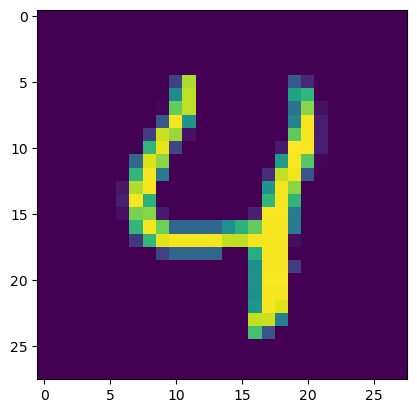

In [70]:
plt.imshow(X_test[4])

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_predict=cnn.predict(X_test)
y_classes=[np.argmax(elements) for elements in y_predict]
y_classes[:5]

313/313 [==============================] - 2s 7ms/step


[7, 2, 1, 0, 4]

In [67]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)